# Boro Sawmill & Timber Co. Inc. Imports Analysis

In [1]:
import pandas as pd
import re

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('Boro Sawmill & Timber Co. Inc. imports.csv')

In [4]:
df.head()

,PRODUCT DESCRIPTION,IMPORTER,IMPORTER ENTITY,SHIPPER,ARRIVAL DATE,YEAR,GROSS WEIGHT (LB),GROSS WEIGHT (KG),FOREIGN PORT,US PORT,VESSEL NAME,COUNTRY OF ORIGIN,MARKS &AMP; NUMBERS,CONSIGNEE ADDRESS,SHIPPER ADDRESS,ZIP CODE,NO. OF CONTAINERS,CONTAINER NUMBER,CONTAINER TYPE,QUANTITY,QUANTITY UNIT,MEASUREMENT,MEASUREMENT UNIT,BILL OF LADING,HOUSE VS MASTER,MASTER B/L,VOYAGE NUMBER,SEAL,SHIP REGISTERED IN,IN-BOND ENTRY TYPE,CARRIER CODE,CARRIER NAME,CARRIER CITY,CARRIER STATE,CARRIER ZIP,CARRIER ADDRESS,NOTIFY PARTY,NOTIFY ADDRESS,PLACE OF RECEIPT
0,FSC 100% EKKI / AZOBE HARDWOOD MATERIAL CERT. ...,"BORO SAWMILL & TIMBER CO., INC.",BORO SAWMILL & TIMBER CO INC,NWS SHIPPING BV,05/07/2025,2025,26479,12036,Rotterdam,"New York/Newark Area, Newark, New Jersey",OOCL CHONGQING,Netherlands,NO MARKS,139 RYERSON AVENUE WAYNE NJ 07470 UNITED STATE...,1E BARENDRECHTSEWEG 82 BARENDRECHT ZH 2992 XC ...,7470,1,CSLU1565283,22G1,11,BDL,10,CM,COSU6414088570,,,059W,BS579466,HONG KONG,,COSU,CHINA OCEAN SHIPPING COMPANY,SECAUCUS,NJ,7094,100 LIGHTING WAY,SAVINO DEL BENE U.S.A. INC.,34 ENGLEHARD AVENUE AVENEL NJ 07001 UNITED STATES,ROTTERDAM
1,------------ FCIU4606655 DESCRIPTION---------P...,BORO SAWMILL TIMBER CO,BORO SAWMILL & TIMBER CO INC,GTI WOOD PRODUCTS INC,05/01/2025,2025,14529,6604,Port Bustamante,"New York, New York",MARFRET GUYANE,Jamaica,NO MARKS,"139 RYERSON AVE WAYNE, NJ 07470 WAYNE, NJ TE US",LOT 12 BB ECCLES EAST BANK DEMERARA TE GEORGETOWN,7470,1,FCIU4606655,2200,22,PCS,0,CM,CMDUCUY0114299,H,CMDUCUY0114050,0UAK5,380643 C7956008,FRANCE,,CMDU,COMPAGNIE MARITIME D-AFFRETEMENT,NORFOLK,VA,23502,5701 LAKE WRIGHT DR,BORO SAWMILL TIMBER CO,"139 RYERSON AVE WAYNE, NJ 07470 WAYNE, NJ","GEORGETOWN, GY"
2,HARDWOOD PALLETS EKKI SAWN TIMBER FSC 100% CER...,BORO SAWMILL & TIMBER CO INC,BORO SAWMILL & TIMBER CO INC,HUPKES WIJMA B.V.,03/20/2025,2025,24141,10973,Rotterdam,"Jacksonville, Florida",MSC JULIA R.,Netherlands,NO MARKS NO MARKS,139 RYERSON AVE WAYNE NJ 07470-7207 UNITED STATES,HAATLANDHAVEN 3 KAMPEN 8263 AS NETHERLANDS,07470-7207,1,MEDU3105707,22G1,9,PKG,9,X,MEDUO7483813,,,508A,BS579470,LIBERIA,,MEDU,MSC MEDITTERRANEAN SHIPPING COMPANY SA,GENEVA,,,,SAVINO DEL BENE USA INC,34 ENGLEHARD AVE AVENEL NJ 07001 UNITED STATES,ROTTERDAM
3,100% EKKI / AZOBE HARDWOOD MATERIAL,"BORO SAWMILL & TIMBER CO., INC.",BORO SAWMILL & TIMBER CO INC,NWS SHIPPING BV,02/20/2025,2025,41800,19000,Rotterdam,"New York/Newark Area, Newark, New Jersey",COSCO HOPE,Netherlands,NO MARKS,139 RYERSON AVENUE WAYNE NJ 07470 UNITED STATE...,1E BARENDRECHTSEWEG 82 BARENDRECHT ZH 2992 XC ...,7470,1,OOCU0592699,22G1,13,BDL,14,CM,COSU6408477910,,,066W,TSK5960377,HONG KONG,,COSU,CHINA OCEAN SHIPPING COMPANY,SECAUCUS,NJ,7094,100 LIGHTING WAY,SAVINO DEL BENE U.S.A. INC.,34 ENGLEHARD AVENUE AVENEL NJ 07001 UNITED STATES,ROTTERDAM
4,SLAC 16 HARDWOOD PALLETS FSC 100% SLAC/STC 16 ...,"BORO SAWMILL & TIMBER CO INC.,",BORO SAWMILL & TIMBER CO INC,HUPKES WIJMA B.V.,02/19/2025,2025,85800,39000,Rotterdam,"New York/Newark Area, Newark, New Jersey",CHENNAI EXPRESS,Netherlands,NO MARKS . . . . . . NO MARKS . . . . .,"139, RYERSON AVE, WAYNE, NJ 07470, USA EIN 11 ...",HAATLANDHAVEN 3 8263 AS KAMPEN THE NETHERLANDS,,2,BMOU2730376 UACU3812638,2210 2210,32,PCS,0,,HLCURTM250126875,,,011W,TSK5960380 TSK5960375,LIBERIA,,HLCU,HAPAG LLOYD A G,HAMBURG,,,399 HOES LN,SAVINO DEL BENE USA - HQ,"34 ENGELHARD AVE. AVENEL NJ07001, USA ATTN BOB...","ROTTERDAM, NL"


In [5]:
df['SHIPPER'].value_counts()

SHIPPER
HUPKES HOUTHANDEL DIEREN BV            18
HUPKES HOUTHANDEL DIEREN B.V.           9
HUPKES WIJMA B.V.                       6
S&R MARINE SERVICE BV AS NVOCC FOR:     4
NWS SHIPPING BV                         2
GTI WOOD PRODUCTS INC                   1
S&R MARINE SERVICE BV                   1
S&R MARINE SERVICES AS NVOCC FOR:       1
WIJMA KAMPEN BV                         1
Name: count, dtype: int64

In [6]:
# Step 1: Normalize text (lowercase, remove punctuation, strip spaces)
def normalize(name):
    name = name.upper()
    name = re.sub(r'[.,\-\/]', '', name)
    name = re.sub(r'\s+', ' ', name)
    name = name.strip()
    return name

In [7]:
df['SHIPPER_CLEANED'] = df['SHIPPER'].apply(normalize)

In [25]:
# Step 2: Define a mapping of normalized names to unified names
name_map = {
    # Wijma Kampen
    'WIJMA KAMPEN BV': 'Wijma Kampen B.V.',

    # Hupkes Wijma
    'HUPKES WIJMA B.V.': 'Hupkes Wijma B.V.',
    'HUPKES WIJMA BV': 'Hupkes Wijma B.V.',

    # Hupkes Houthandel Dieren BV
    'HUPKES HOUTHANDEL DIEREN BV': 'Hupkes Houthandel Dieren B.V.',
    'HUPKES HOUTHANDEL DIEREN B.V.': 'Hupkes Houthandel Dieren B.V.',

    # # Others
     'S&R MARINE SERVICE BV AS NVOCC FOR:': 'S&R Marine Service BV',
    'NWS SHIPPING BV': 'NWS Shipping BV',
    'NWS Shipping BV:': 'NWS Shipping BV',
    'GTI WOOD PRODUCTS INC': 'G & T Wood Products Inc.',
    'S&R MARINE SERVICE BV': 'S&R Marine Service BV',
    'S&R MARINE SERVICES AS NVOCC FOR:': 'S&R Marine Service BV',
}

In [26]:
# Step 3: Map normalized names to unified names
df['SHIPPER_CLEANED'] = df['SHIPPER_CLEANED'].replace(name_map)

In [27]:
# Step 4: Group and sum by cleaned name
df.groupby('SHIPPER_CLEANED').size().reset_index(name='Total Count').sort_values(by='Total Count', ascending=False)

,SHIPPER_CLEANED,Total Count
1,Hupkes Houthandel Dieren B.V.,27
2,Hupkes Wijma B.V.,6
4,S&R Marine Service BV,6
3,NWS Shipping BV,2
0,G & T Wood Products Inc.,1
5,Wijma Kampen B.V.,1


In [86]:
company_to_country = {
    'Hupkes Houthandel Dieren B.V.': 'Netherlands',
    'Hupkes Wijma B.V.': 'Netherlands',
    'S&R Marine Service BV': 'Netherlands',
    'NWS Shipping BV': 'Netherlands',
    'G & T Wood Products Inc.': 'Jamaica',
    'Wijma Kampen B.V.': 'Netherlands',
}

In [87]:
df['SHIPPER_COUNTRY'] = df['SHIPPER_CLEANED'].map(company_to_country)

In [88]:
df

,PRODUCT DESCRIPTION,IMPORTER,IMPORTER ENTITY,SHIPPER,ARRIVAL DATE,YEAR,GROSS WEIGHT (LB),GROSS WEIGHT (KG),FOREIGN PORT,US PORT,VESSEL NAME,COUNTRY OF ORIGIN,MARKS &AMP; NUMBERS,CONSIGNEE ADDRESS,SHIPPER ADDRESS,ZIP CODE,NO. OF CONTAINERS,CONTAINER NUMBER,CONTAINER TYPE,QUANTITY,QUANTITY UNIT,MEASUREMENT,MEASUREMENT UNIT,BILL OF LADING,HOUSE VS MASTER,MASTER B/L,VOYAGE NUMBER,SEAL,SHIP REGISTERED IN,IN-BOND ENTRY TYPE,CARRIER CODE,CARRIER NAME,CARRIER CITY,CARRIER STATE,CARRIER ZIP,CARRIER ADDRESS,NOTIFY PARTY,NOTIFY ADDRESS,PLACE OF RECEIPT,SHIPPER_CLEANED,SHIPPER_COUNTRY,purpleheart,ekki,bulletwood
0,FSC 100% EKKI / AZOBE HARDWOOD MATERIAL CERT. ...,"BORO SAWMILL & TIMBER CO., INC.",BORO SAWMILL & TIMBER CO INC,NWS SHIPPING BV,05/07/2025,2025,26479,12036,Rotterdam,"New York/Newark Area, Newark, New Jersey",OOCL CHONGQING,Netherlands,NO MARKS,139 RYERSON AVENUE WAYNE NJ 07470 UNITED STATE...,1E BARENDRECHTSEWEG 82 BARENDRECHT ZH 2992 XC ...,7470,1,CSLU1565283,22G1,11,BDL,10,CM,COSU6414088570,,,059W,BS579466,HONG KONG,,COSU,CHINA OCEAN SHIPPING COMPANY,SECAUCUS,NJ,7094,100 LIGHTING WAY,SAVINO DEL BENE U.S.A. INC.,34 ENGLEHARD AVENUE AVENEL NJ 07001 UNITED STATES,ROTTERDAM,NWS Shipping BV,Netherlands,False,True,False
1,------------ FCIU4606655 DESCRIPTION---------P...,BORO SAWMILL TIMBER CO,BORO SAWMILL & TIMBER CO INC,GTI WOOD PRODUCTS INC,05/01/2025,2025,14529,6604,Port Bustamante,"New York, New York",MARFRET GUYANE,Jamaica,NO MARKS,"139 RYERSON AVE WAYNE, NJ 07470 WAYNE, NJ TE US",LOT 12 BB ECCLES EAST BANK DEMERARA TE GEORGETOWN,7470,1,FCIU4606655,2200,22,PCS,0,CM,CMDUCUY0114299,H,CMDUCUY0114050,0UAK5,380643 C7956008,FRANCE,,CMDU,COMPAGNIE MARITIME D-AFFRETEMENT,NORFOLK,VA,23502,5701 LAKE WRIGHT DR,BORO SAWMILL TIMBER CO,"139 RYERSON AVE WAYNE, NJ 07470 WAYNE, NJ","GEORGETOWN, GY",G & T Wood Products Inc.,Jamaica,True,False,False
2,HARDWOOD PALLETS EKKI SAWN TIMBER FSC 100% CER...,BORO SAWMILL & TIMBER CO INC,BORO SAWMILL & TIMBER CO INC,HUPKES WIJMA B.V.,03/20/2025,2025,24141,10973,Rotterdam,"Jacksonville, Florida",MSC JULIA R.,Netherlands,NO MARKS NO MARKS,139 RYERSON AVE WAYNE NJ 07470-7207 UNITED STATES,HAATLANDHAVEN 3 KAMPEN 8263 AS NETHERLANDS,07470-7207,1,MEDU3105707,22G1,9,PKG,9,X,MEDUO7483813,,,508A,BS579470,LIBERIA,,MEDU,MSC MEDITTERRANEAN SHIPPING COMPANY SA,GENEVA,,,,SAVINO DEL BENE USA INC,34 ENGLEHARD AVE AVENEL NJ 07001 UNITED STATES,ROTTERDAM,Hupkes Wijma B.V.,Netherlands,False,True,False
3,100% EKKI / AZOBE HARDWOOD MATERIAL,"BORO SAWMILL & TIMBER CO., INC.",BORO SAWMILL & TIMBER CO INC,NWS SHIPPING BV,02/20/2025,2025,41800,19000,Rotterdam,"New York/Newark Area, Newark, New Jersey",COSCO HOPE,Netherlands,NO MARKS,139 RYERSON AVENUE WAYNE NJ 07470 UNITED STATE...,1E BARENDRECHTSEWEG 82 BARENDRECHT ZH 2992 XC ...,7470,1,OOCU0592699,22G1,13,BDL,14,CM,COSU6408477910,,,066W,TSK5960377,HONG KONG,,COSU,CHINA OCEAN SHIPPING COMPANY,SECAUCUS,NJ,7094,100 LIGHTING WAY,SAVINO DEL BENE U.S.A. INC.,34 ENGLEHARD AVENUE AVENEL NJ 07001 UNITED STATES,ROTTERDAM,NWS Shipping BV,Netherlands,False,True,False
4,SLAC 16 HARDWOOD PALLETS FSC 100% SLAC/STC 16 ...,"BORO SAWMILL & TIMBER CO INC.,",BORO SAWMILL & TIMBER CO INC,HUPKES WIJMA B.V.,02/19/2025,2025,85800,39000,Rotterdam,"New York/Newark Area, Newark, New Jersey",CHENNAI EXPRESS,Netherlands,NO MARKS . . . . . . NO MARKS . . . . .,"139, RYERSON AVE, WAYNE, NJ 07470, USA EIN 11 ...",HAATLANDHAVEN 3 8263 AS KAMPEN THE NETHERLANDS,,2,BMOU2730376 UACU3812638,2210 2210,32,PCS,0,,HLCURTM250126875,,,011W,TSK5960380 TSK5960375,LIBERIA,,HLCU,HAPAG LLOYD A G,HAMBURG,,,399 HOES LN,SAVINO DEL BENE USA - HQ,"34 ENGELHARD AVE. AVENEL NJ07001, USA ATTN BOB...","ROTTERDAM, NL",Hupkes Wijma B.V.,Netherlands,False,True,False
5,9 HARDWOOD PALLETS FSC 100 PCT EKKI / AZOBE HA...,BORO SAWMILL & TIMBER CO INC.,BORO SAWMILL & TIMBER CO INC,HUPKES WIJMA B.V.,09/23/2024,2024,42570,19350,Antwerp,"New York/Newark Area, Newark, New Jersey",ATLANTIC SEA,Belgium,N/M . . . . .,"139 RYERSON AVE WAYNE, ISP 

In [89]:
df['ekki'] = df['PRODUCT DESCRIPTION'].str.contains('EKKI|AZOBE', regex=True, case=False, na=False)

In [90]:
df['bulletwood'] = df['PRODUCT DESCRIPTION'].str.contains('Bulletwood|Massaranduba', regex=True, case=False, na=False)

In [91]:
df['purpleheart'] = df['PRODUCT DESCRIPTION'].str.contains('purple heart', regex=True, case=False, na=False)

In [92]:
#df.head(50)

In [93]:
df['ekki'].value_counts()

ekki
True     42
False     1
Name: count, dtype: int64

In [94]:
df['bulletwood'].value_counts()

bulletwood
False    42
True      1
Name: count, dtype: int64

In [95]:
df['purpleheart'].value_counts()

purpleheart
False    42
True      1
Name: count, dtype: int64

In [96]:
df.to_csv('boro_sawmill_imports_cleaned.csv', index=False)

In [97]:
df.head()

,PRODUCT DESCRIPTION,IMPORTER,IMPORTER ENTITY,SHIPPER,ARRIVAL DATE,YEAR,GROSS WEIGHT (LB),GROSS WEIGHT (KG),FOREIGN PORT,US PORT,VESSEL NAME,COUNTRY OF ORIGIN,MARKS &AMP; NUMBERS,CONSIGNEE ADDRESS,SHIPPER ADDRESS,ZIP CODE,NO. OF CONTAINERS,CONTAINER NUMBER,CONTAINER TYPE,QUANTITY,QUANTITY UNIT,MEASUREMENT,MEASUREMENT UNIT,BILL OF LADING,HOUSE VS MASTER,MASTER B/L,VOYAGE NUMBER,SEAL,SHIP REGISTERED IN,IN-BOND ENTRY TYPE,CARRIER CODE,CARRIER NAME,CARRIER CITY,CARRIER STATE,CARRIER ZIP,CARRIER ADDRESS,NOTIFY PARTY,NOTIFY ADDRESS,PLACE OF RECEIPT,SHIPPER_CLEANED,SHIPPER_COUNTRY,purpleheart,ekki,bulletwood
0,FSC 100% EKKI / AZOBE HARDWOOD MATERIAL CERT. ...,"BORO SAWMILL & TIMBER CO., INC.",BORO SAWMILL & TIMBER CO INC,NWS SHIPPING BV,05/07/2025,2025,26479,12036,Rotterdam,"New York/Newark Area, Newark, New Jersey",OOCL CHONGQING,Netherlands,NO MARKS,139 RYERSON AVENUE WAYNE NJ 07470 UNITED STATE...,1E BARENDRECHTSEWEG 82 BARENDRECHT ZH 2992 XC ...,7470,1,CSLU1565283,22G1,11,BDL,10,CM,COSU6414088570,,,059W,BS579466,HONG KONG,,COSU,CHINA OCEAN SHIPPING COMPANY,SECAUCUS,NJ,7094,100 LIGHTING WAY,SAVINO DEL BENE U.S.A. INC.,34 ENGLEHARD AVENUE AVENEL NJ 07001 UNITED STATES,ROTTERDAM,NWS Shipping BV,Netherlands,False,True,False
1,------------ FCIU4606655 DESCRIPTION---------P...,BORO SAWMILL TIMBER CO,BORO SAWMILL & TIMBER CO INC,GTI WOOD PRODUCTS INC,05/01/2025,2025,14529,6604,Port Bustamante,"New York, New York",MARFRET GUYANE,Jamaica,NO MARKS,"139 RYERSON AVE WAYNE, NJ 07470 WAYNE, NJ TE US",LOT 12 BB ECCLES EAST BANK DEMERARA TE GEORGETOWN,7470,1,FCIU4606655,2200,22,PCS,0,CM,CMDUCUY0114299,H,CMDUCUY0114050,0UAK5,380643 C7956008,FRANCE,,CMDU,COMPAGNIE MARITIME D-AFFRETEMENT,NORFOLK,VA,23502,5701 LAKE WRIGHT DR,BORO SAWMILL TIMBER CO,"139 RYERSON AVE WAYNE, NJ 07470 WAYNE, NJ","GEORGETOWN, GY",G & T Wood Products Inc.,Jamaica,True,False,False
2,HARDWOOD PALLETS EKKI SAWN TIMBER FSC 100% CER...,BORO SAWMILL & TIMBER CO INC,BORO SAWMILL & TIMBER CO INC,HUPKES WIJMA B.V.,03/20/2025,2025,24141,10973,Rotterdam,"Jacksonville, Florida",MSC JULIA R.,Netherlands,NO MARKS NO MARKS,139 RYERSON AVE WAYNE NJ 07470-7207 UNITED STATES,HAATLANDHAVEN 3 KAMPEN 8263 AS NETHERLANDS,07470-7207,1,MEDU3105707,22G1,9,PKG,9,X,MEDUO7483813,,,508A,BS579470,LIBERIA,,MEDU,MSC MEDITTERRANEAN SHIPPING COMPANY SA,GENEVA,,,,SAVINO DEL BENE USA INC,34 ENGLEHARD AVE AVENEL NJ 07001 UNITED STATES,ROTTERDAM,Hupkes Wijma B.V.,Netherlands,False,True,False
3,100% EKKI / AZOBE HARDWOOD MATERIAL,"BORO SAWMILL & TIMBER CO., INC.",BORO SAWMILL & TIMBER CO INC,NWS SHIPPING BV,02/20/2025,2025,41800,19000,Rotterdam,"New York/Newark Area, Newark, New Jersey",COSCO HOPE,Netherlands,NO MARKS,139 RYERSON AVENUE WAYNE NJ 07470 UNITED STATE...,1E BARENDRECHTSEWEG 82 BARENDRECHT ZH 2992 XC ...,7470,1,OOCU0592699,22G1,13,BDL,14,CM,COSU6408477910,,,066W,TSK5960377,HONG KONG,,COSU,CHINA OCEAN SHIPPING COMPANY,SECAUCUS,NJ,7094,100 LIGHTING WAY,SAVINO DEL BENE U.S.A. INC.,34 ENGLEHARD AVENUE AVENEL NJ 07001 UNITED STATES,ROTTERDAM,NWS Shipping BV,Netherlands,False,True,False
4,SLAC 16 HARDWOOD PALLETS FSC 100% SLAC/STC 16 ...,"BORO SAWMILL & TIMBER CO INC.,",BORO SAWMILL & TIMBER CO INC,HUPKES WIJMA B.V.,02/19/2025,2025,85800,39000,Rotterdam,"New York/Newark Area, Newark, New Jersey",CHENNAI EXPRESS,Netherlands,NO MARKS . . . . . . NO MARKS . . . . .,"139, RYERSON AVE, WAYNE, NJ 07470, USA EIN 11 ...",HAATLANDHAVEN 3 8263 AS KAMPEN THE NETHERLANDS,,2,BMOU2730376 UACU3812638,2210 2210,32,PCS,0,,HLCURTM250126875,,,011W,TSK5960380 TSK5960375,LIBERIA,,HLCU,HAPAG LLOYD A G,HAMBURG,,,399 HOES LN,SAVINO DEL BENE USA - HQ,"34 ENGELHARD AVE. AVENEL NJ07001, USA ATTN BOB...","ROTTERDAM, NL",Hupkes Wijma B.V.,Netherlands,False,True,False


## Average weight of each shipment

In [98]:
df.groupby('SHIPPER_CLEANED')['GROSS WEIGHT (KG)'].mean().reset_index().sort_values(by='GROSS WEIGHT (KG)', ascending=False)

,SHIPPER_CLEANED,GROSS WEIGHT (KG)
5,Wijma Kampen B.V.,28431.000000
1,Hupkes Houthandel Dieren B.V.,27061.666667
4,S&R Marine Service BV,22901.833333
2,Hupkes Wijma B.V.,21303.833333
3,NWS Shipping BV,15518.000000
0,G & T Wood Products Inc.,6604.000000


### Wijma Kampen has the highest weighted shipments by mean (but only had one shipment) - next is Hupkes Houthandel Dieren B.V., which made many shipments. 

In [99]:
df.groupby('SHIPPER_CLEANED')['GROSS WEIGHT (KG)'].median().reset_index().sort_values(by='GROSS WEIGHT (KG)', ascending=False)

,SHIPPER_CLEANED,GROSS WEIGHT (KG)
5,Wijma Kampen B.V.,28431.0
1,Hupkes Houthandel Dieren B.V.,19800.0
4,S&R Marine Service BV,19600.0
2,Hupkes Wijma B.V.,19500.0
3,NWS Shipping BV,15518.0
0,G & T Wood Products Inc.,6604.0


### The medians are a lot closer together for most of the main companies, around 20,000kg per shipment

In [100]:
avg_weight_per_year = df.groupby(['SHIPPER_CLEANED', 'YEAR'])['GROSS WEIGHT (KG)'].mean().reset_index().pivot(index='SHIPPER_CLEANED', columns='YEAR', values='GROSS WEIGHT (KG)') 

In [101]:
avg_weight_per_year

YEAR,2020,2021,2022,2023,2024,2025
SHIPPER_CLEANED,,,,,,
G & T Wood Products Inc.,NaN,NaN,NaN,NaN,NaN,6604.0
Hupkes Houthandel Dieren B.V.,27591.764706,25222.777778,34600.0,NaN,NaN,NaN
Hupkes Wijma B.V.,NaN,NaN,NaN,NaN,19462.5,24986.5
NWS Shipping BV,NaN,NaN,NaN,NaN,NaN,15518.0
S&R Marine Service BV,NaN,NaN,NaN,19711.0,23540.0,NaN
Wijma Kampen B.V.,28431.000000,NaN,NaN,NaN,NaN,NaN


In [102]:
avg_weight_per_year.to_csv('boro_sawmill_shipments_avg_weight_per_year.csv')

In [103]:
df.dtypes

PRODUCT DESCRIPTION    object
IMPORTER               object
IMPORTER ENTITY        object
SHIPPER                object
ARRIVAL DATE           object
YEAR                    int64
GROSS WEIGHT (LB)       int64
GROSS WEIGHT (KG)       int64
FOREIGN PORT           object
US PORT                object
VESSEL NAME            object
COUNTRY OF ORIGIN      object
MARKS &AMP; NUMBERS    object
CONSIGNEE ADDRESS      object
SHIPPER ADDRESS        object
ZIP CODE               object
NO. OF CONTAINERS       int64
CONTAINER NUMBER       object
CONTAINER TYPE         object
QUANTITY                int64
QUANTITY UNIT          object
MEASUREMENT             int64
MEASUREMENT UNIT       object
BILL OF LADING         object
HOUSE VS MASTER        object
MASTER B/L             object
VOYAGE NUMBER          object
SEAL                   object
SHIP REGISTERED IN     object
IN-BOND ENTRY TYPE     object
CARRIER CODE           object
CARRIER NAME           object
CARRIER CITY           object
CARRIER ST

In [104]:
df.groupby('YEAR')['SHIPPER_COUNTRY'].value_counts()

YEAR  SHIPPER_COUNTRY
2020  Netherlands        18
2021  Netherlands         9
2022  Netherlands         1
2023  Netherlands         1
2024  Netherlands         9
2025  Netherlands         4
      Jamaica             1
Name: count, dtype: int64

## Shipping countries per year

In [105]:
shipping_countries_per_year = df.pivot_table(
    index='YEAR',
    columns='SHIPPER_COUNTRY',
    values='SHIPPER_CLEANED',  # any column name works for counting rows
    aggfunc='size',
    fill_value=0
)

In [106]:
shipping_countries_per_year

SHIPPER_COUNTRY,Jamaica,Netherlands
YEAR,,
2020,0,18
2021,0,9
2022,0,1
2023,0,1
2024,0,9
2025,1,4


<Axes: xlabel='YEAR'>

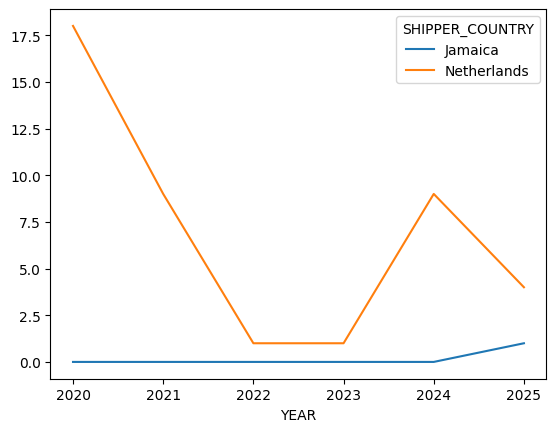

In [107]:
shipping_countries_per_year.plot()

### From a high in 2020, the overall shipments have reduced, though they increased again in 2024.

## Shipping countries per year for ekki wood

In [108]:
ekki_shipping_countries_per_year = df[df['ekki']].pivot_table(
    index='YEAR',
    columns='SHIPPER_COUNTRY',
    values='SHIPPER_CLEANED',  # any column works for counting rows
    aggfunc='size',
    fill_value=0
)

In [109]:
ekki_shipping_countries_per_year

SHIPPER_COUNTRY,Netherlands
YEAR,
2020,18
2021,9
2022,1
2023,1
2024,9
2025,4


<Axes: xlabel='YEAR'>

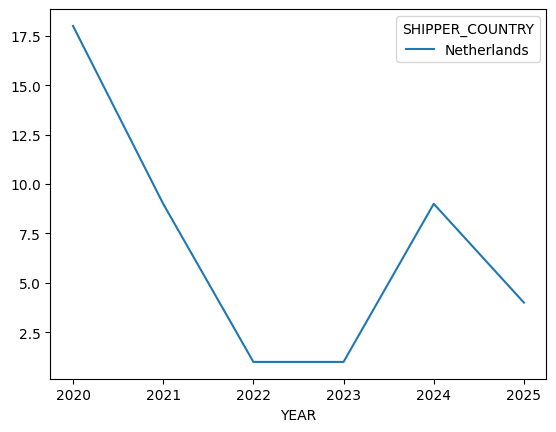

In [110]:
ekki_shipping_countries_per_year.plot()

### Boro ships ekki only through the Netherlands

## Wood species shipments over the years

In [111]:
# List of boolean wood species columns
species_cols = [
    'ekki', 'bulletwood', 'purpleheart'
]

In [112]:
# Create the pivot table: YEAR as index, species as columns, values = count of True values
species_per_year = df.groupby('YEAR')[species_cols].sum()

In [113]:
species_per_year

,ekki,bulletwood,purpleheart
YEAR,,,
2020,18,1,0
2021,9,0,0
2022,1,0,0
2023,1,0,0
2024,9,0,0
2025,4,0,1


In [114]:
import matplotlib.pyplot as plt

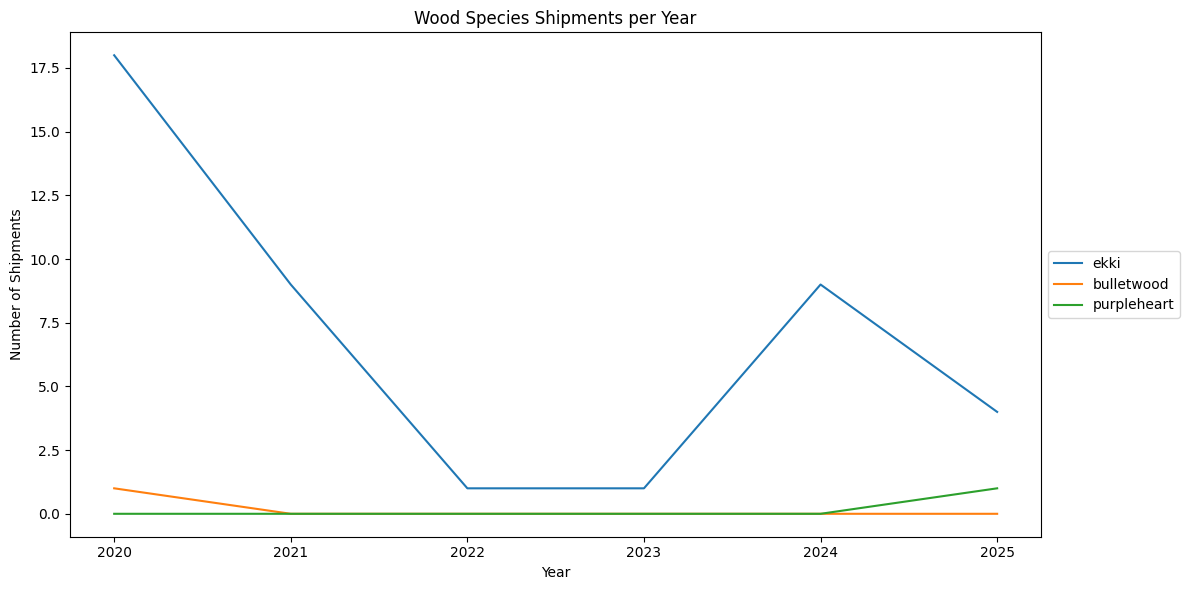

In [115]:
ax = species_per_year.plot(figsize=(12, 6))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title('Wood Species Shipments per Year')
plt.xlabel('Year')
plt.ylabel('Number of Shipments')
plt.tight_layout()
plt.show()

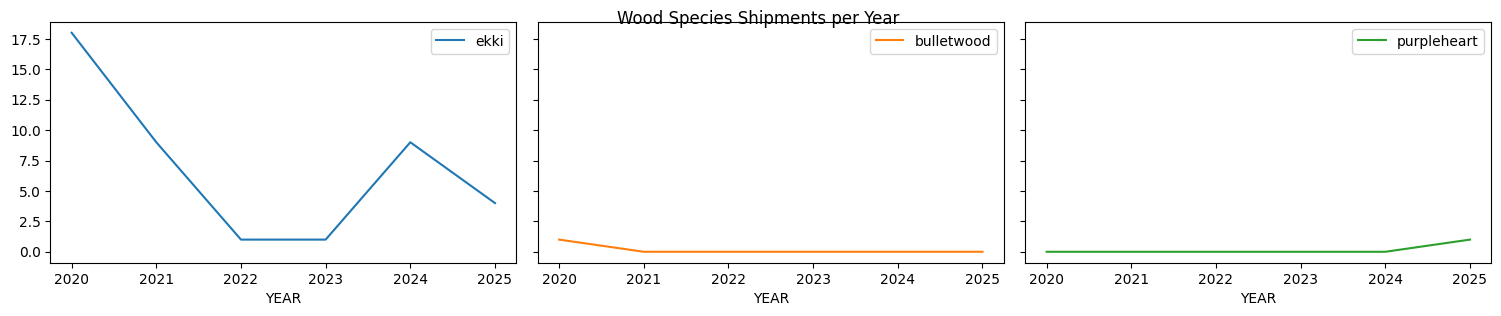

In [116]:
# Create subplots for each species
axes = species_per_year.plot(
    subplots=True,
    layout=(6, 3),  # adjust grid size to fit 17 species (e.g., 6 rows, 3 columns)
    figsize=(15, 18),
    sharex=True,
    sharey=True,
    title='Wood Species Shipments per Year'
)

# Adjust layout and spacing
plt.tight_layout()
plt.show()

### Boro imported purpleheart for the first time (at least in this dataset) in 2025

## Creating a sub-dataframe for New York area ports

In [117]:
ny = df[df['US PORT'].isin([
    'New York/Newark Area, Newark, New Jersey',
    'Albany, New York',
    'New York, New York'
])]

In [118]:
ny.shape

(42, 44)

### Only one shipment did not come through New York ports. It came through Jacksonville, Florida this year

In [119]:
# Create the pivot table: YEAR as index, species as columns, values = count of True values
species_per_year = ny.groupby('YEAR')[species_cols].sum()

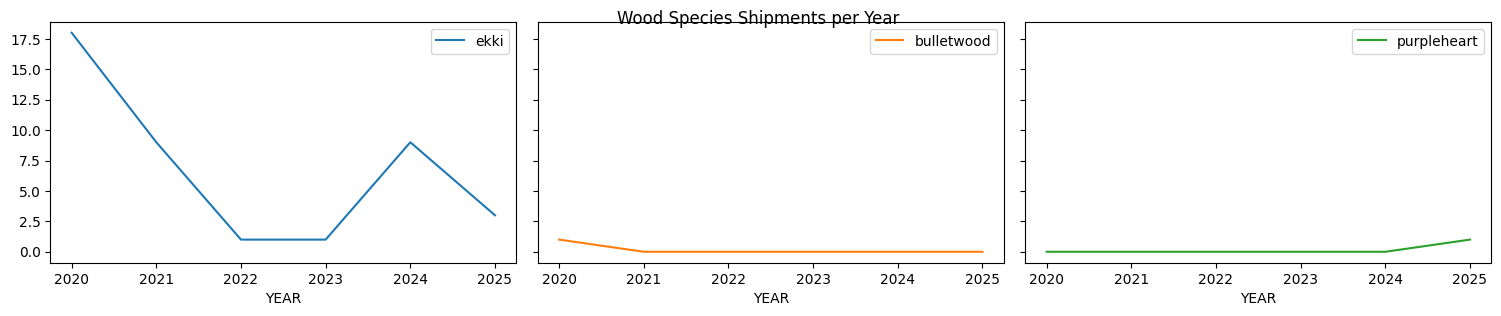

In [120]:
# Create subplots for each species
axes = species_per_year.plot(
    subplots=True,
    layout=(6, 3),  # adjust grid size to fit 17 species (e.g., 6 rows, 3 columns)
    figsize=(15, 18),
    sharex=True,
    sharey=True,
    title='Wood Species Shipments per Year'
)

# Adjust layout and spacing
plt.tight_layout()
plt.show()

### Follow similar trends as the overall data

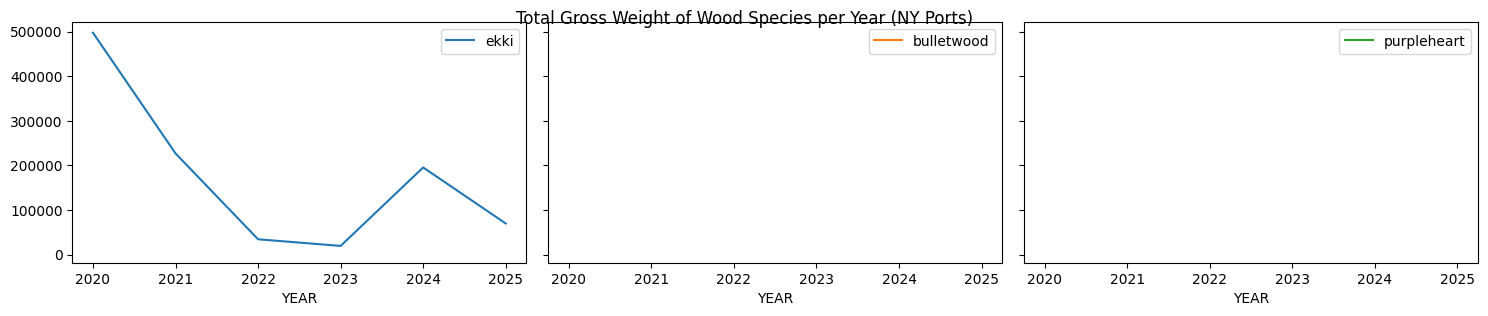

In [121]:
# Dictionary to hold total weights per species per year
species_weight_by_year = {}

# Loop through each species
for species in species_cols:
    species_weight_by_year[species] = ny[ny[species]].groupby('YEAR')['GROSS WEIGHT (KG)'].sum()

# Combine into one DataFrame
weight_per_species = pd.DataFrame(species_weight_by_year)

# Plot each species in a separate subplot
axes = weight_per_species.plot(
    subplots=True,
    layout=(6, 3),  # adjust to fit the number of species
    figsize=(15, 18),
    sharex=True,
    sharey=True,
    title='Total Gross Weight of Wood Species per Year (NY Ports)'
)

plt.tight_layout()
plt.show()

## Shipping countries per year for New York area ports

In [122]:
shipping_countries_per_year = ny.pivot_table(
    index='YEAR',
    columns='SHIPPER_COUNTRY',
    values='SHIPPER_CLEANED',  # any column name works for counting rows
    aggfunc='size',
    fill_value=0
)

In [123]:
shipping_countries_per_year

SHIPPER_COUNTRY,Jamaica,Netherlands
YEAR,,
2020,0,18
2021,0,9
2022,0,1
2023,0,1
2024,0,9
2025,1,3


<Axes: xlabel='YEAR'>

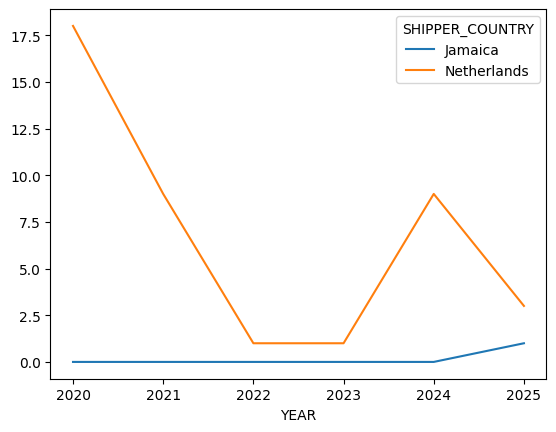

In [124]:
shipping_countries_per_year.plot()

## Similar trends as the overall data. Where does the U.S.-based company import from? 

In [125]:
shipping_countries_per_year = ny.pivot_table(
    index='YEAR',
    columns='SHIPPER_COUNTRY',
    values='GROSS WEIGHT (KG)',  # any column name works for counting rows
    aggfunc='sum',
    fill_value=0
)

In [126]:
shipping_countries_per_year

SHIPPER_COUNTRY,Jamaica,Netherlands
YEAR,,
2020,0,497491
2021,0,227005
2022,0,34600
2023,0,19711
2024,0,195550
2025,6604,70036


<Axes: xlabel='YEAR'>

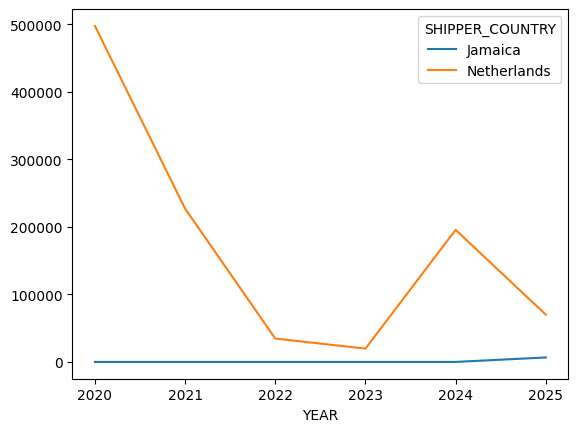

In [127]:
shipping_countries_per_year.plot()

## Shipping countries per year for New York area ports, for ekki wood

In [128]:
ekki_shipping_countries_per_year = ny[ny['ekki']].pivot_table(
    index='YEAR',
    columns='SHIPPER_COUNTRY',
    values='SHIPPER_CLEANED',  # any column works for counting rows
    aggfunc='size',
    fill_value=0
)

In [129]:
ekki_shipping_countries_per_year

SHIPPER_COUNTRY,Netherlands
YEAR,
2020,18
2021,9
2022,1
2023,1
2024,9
2025,3


<Axes: xlabel='YEAR'>

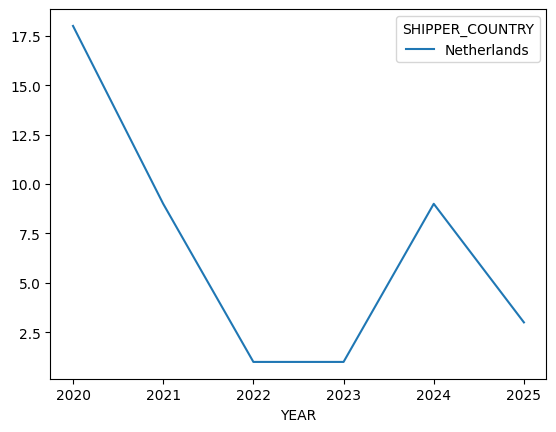

In [130]:
ekki_shipping_countries_per_year.plot()

In [131]:
ekki_shipping_countries_per_year = ny[ny['ekki']].pivot_table(
    index='YEAR',
    columns='SHIPPER_COUNTRY',
    values='GROSS WEIGHT (KG)',  # any column works for counting rows
    aggfunc='sum',
    fill_value=0
)

In [132]:
ekki_shipping_countries_per_year

SHIPPER_COUNTRY,Netherlands
YEAR,
2020,497491
2021,227005
2022,34600
2023,19711
2024,195550
2025,70036


<Axes: xlabel='YEAR'>

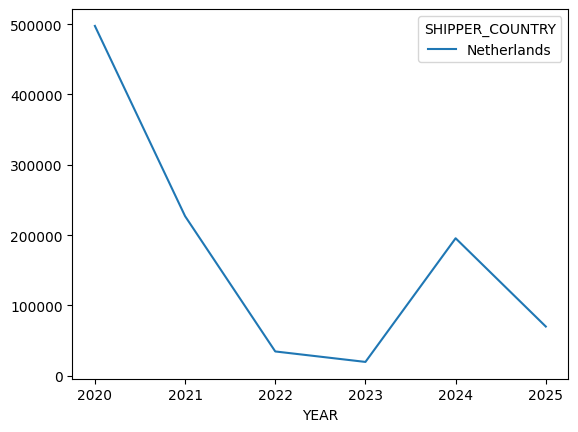

In [133]:
ekki_shipping_countries_per_year.plot()

### Weight of ekki shipped to New York-area ports was highest in 2020, and spiked again in 2024 

In [134]:
ny.groupby('SHIPPER_CLEANED')['GROSS WEIGHT (KG)'].mean().reset_index().sort_values(by='GROSS WEIGHT (KG)', ascending=False)

,SHIPPER_CLEANED,GROSS WEIGHT (KG)
5,Wijma Kampen B.V.,28431.000000
1,Hupkes Houthandel Dieren B.V.,27061.666667
2,Hupkes Wijma B.V.,23370.000000
4,S&R Marine Service BV,22901.833333
3,NWS Shipping BV,15518.000000
0,G & T Wood Products Inc.,6604.000000


In [135]:
ny.groupby('SHIPPER_CLEANED')['GROSS WEIGHT (KG)'].median().reset_index().sort_values(by='GROSS WEIGHT (KG)', ascending=False)

,SHIPPER_CLEANED,GROSS WEIGHT (KG)
5,Wijma Kampen B.V.,28431.0
1,Hupkes Houthandel Dieren B.V.,19800.0
4,S&R Marine Service BV,19600.0
2,Hupkes Wijma B.V.,19500.0
3,NWS Shipping BV,15518.0
0,G & T Wood Products Inc.,6604.0


In [136]:
shipments_per_shipper_ny = ny.pivot_table(
    index='YEAR',
    columns='SHIPPER_CLEANED',
    values='GROSS WEIGHT (KG)',  # any column name is fine for counting rows
    aggfunc='size',
    fill_value=0
)

In [137]:
shipments_per_shipper_ny

SHIPPER_CLEANED,G & T Wood Products Inc.,Hupkes Houthandel Dieren B.V.,Hupkes Wijma B.V.,NWS Shipping BV,S&R Marine Service BV,Wijma Kampen B.V.
YEAR,,,,,,
2020,0,17,0,0,0,1
2021,0,9,0,0,0,0
2022,0,1,0,0,0,0
2023,0,0,0,0,1,0
2024,0,0,4,0,5,0
2025,1,0,1,2,0,0


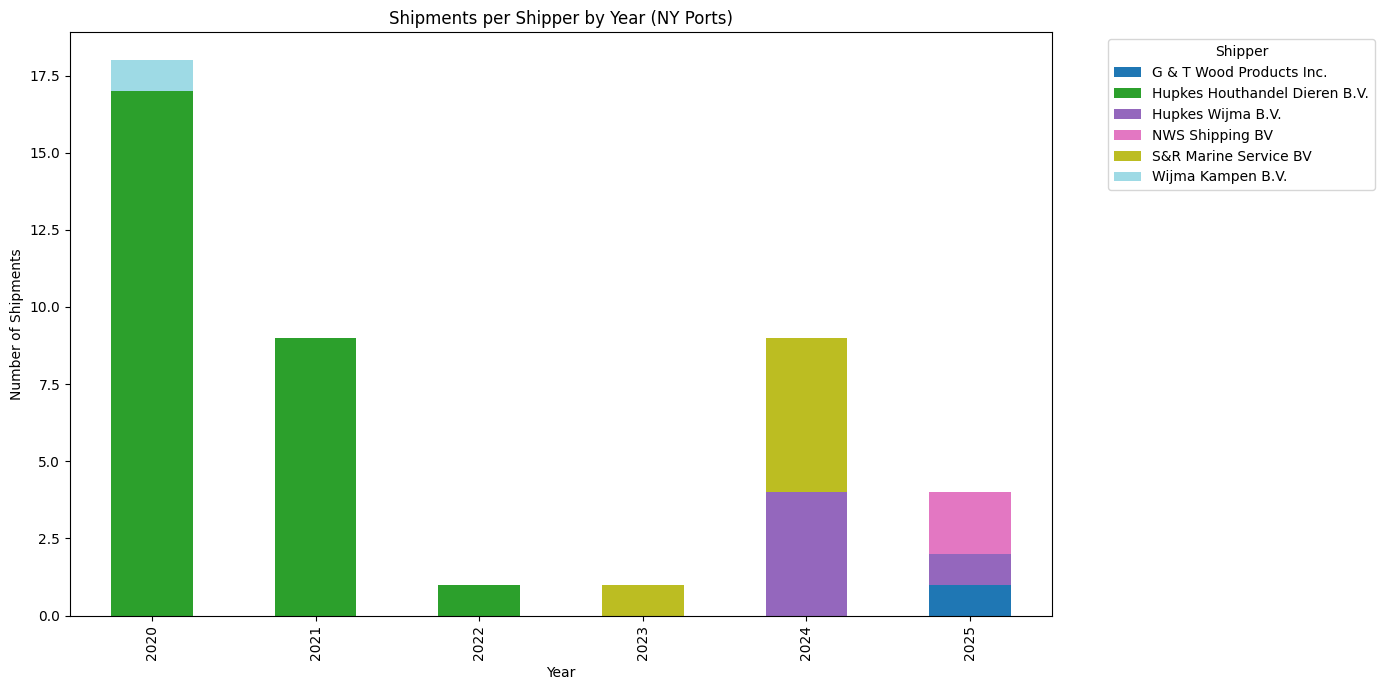

In [138]:
shipments_per_shipper_ny.plot(
    kind='bar',
    stacked=True,
    figsize=(14, 7),
    colormap='tab20'  # optional: use a diverse color palette
)

plt.title('Shipments per Shipper by Year (NY Ports)')
plt.xlabel('Year')
plt.ylabel('Number of Shipments')
plt.legend(title='Shipper', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Between 2020 and 2024, Hupkes Houthandel Dieren or Wijma Kampen B.V. (or Hupkes Wijma B.V. after the merger) imported most wood bought by Boro Sawmill. Two NVOCC (Non-Vessel Operating Common Carrier) companies based in the Netherlands, S&R Marine Service BV and NWS Shipping BV, started shipping some shipments in 2023-2024. These companies lease or buy space from vessel-operating carriers (VOCCs) and then resell this space to shippers, often consolidating multiple customers' cargo into containers for efficiency. So, we don't know from this who was the actual shipper. In 2025, Boro Sawmill did not import from Wijma Kampen, but diversified its imports also to G&T Wood Products Inc., which is a long-established stair parts wholesaler based in Odenton, Maryland, which seems to have offices in Jamaica - made this shipment from Jamaica. 

In [139]:
shipments_per_shipper_ny_weight = ny.pivot_table(
    index='YEAR',
    columns='SHIPPER_CLEANED',
    values='GROSS WEIGHT (KG)',  # any column name is fine for counting rows
    aggfunc='sum',
    fill_value=0
)

In [140]:
shipments_per_shipper_ny_weight

SHIPPER_CLEANED,G & T Wood Products Inc.,Hupkes Houthandel Dieren B.V.,Hupkes Wijma B.V.,NWS Shipping BV,S&R Marine Service BV,Wijma Kampen B.V.
YEAR,,,,,,
2020,0,469060,0,0,0,28431
2021,0,227005,0,0,0,0
2022,0,34600,0,0,0,0
2023,0,0,0,0,19711,0
2024,0,0,77850,0,117700,0
2025,6604,0,39000,31036,0,0


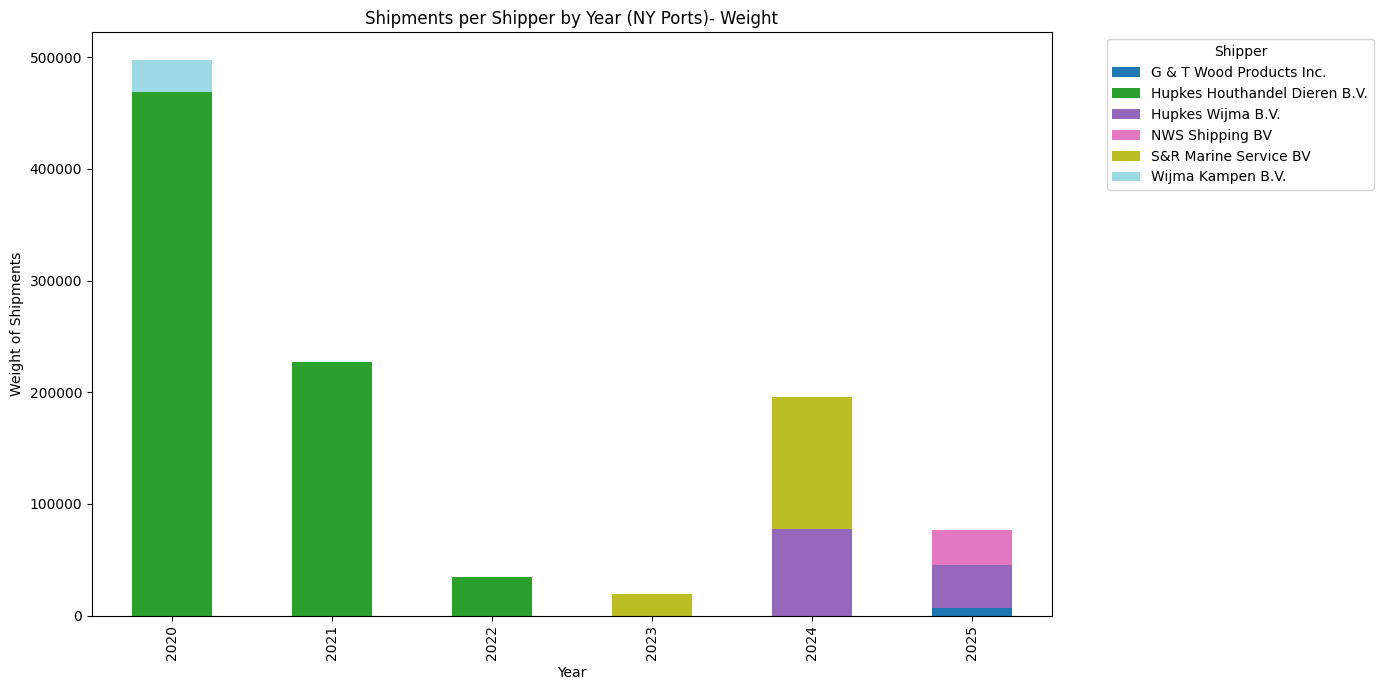

In [141]:
shipments_per_shipper_ny_weight.plot(
    kind='bar',
    stacked=True,
    figsize=(14, 7),
    colormap='tab20'  # optional: use a diverse color palette
)

plt.title('Shipments per Shipper by Year (NY Ports)- Weight')
plt.xlabel('Year')
plt.ylabel('Weight of Shipments')
plt.legend(title='Shipper', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Ekki shipments per shipper - New York ports 

In [142]:
ekki_shipments_per_shipper_ny = ny[ny['ekki']].pivot_table(
    index='YEAR',
    columns='SHIPPER_CLEANED',
    values='GROSS WEIGHT (KG)',  # any column name is fine for counting rows
    aggfunc='size',
    fill_value=0
)

In [143]:
ekki_shipments_per_shipper_ny

SHIPPER_CLEANED,Hupkes Houthandel Dieren B.V.,Hupkes Wijma B.V.,NWS Shipping BV,S&R Marine Service BV,Wijma Kampen B.V.
YEAR,,,,,
2020,17,0,0,0,1
2021,9,0,0,0,0
2022,1,0,0,0,0
2023,0,0,0,1,0
2024,0,4,0,5,0
2025,0,1,2,0,0


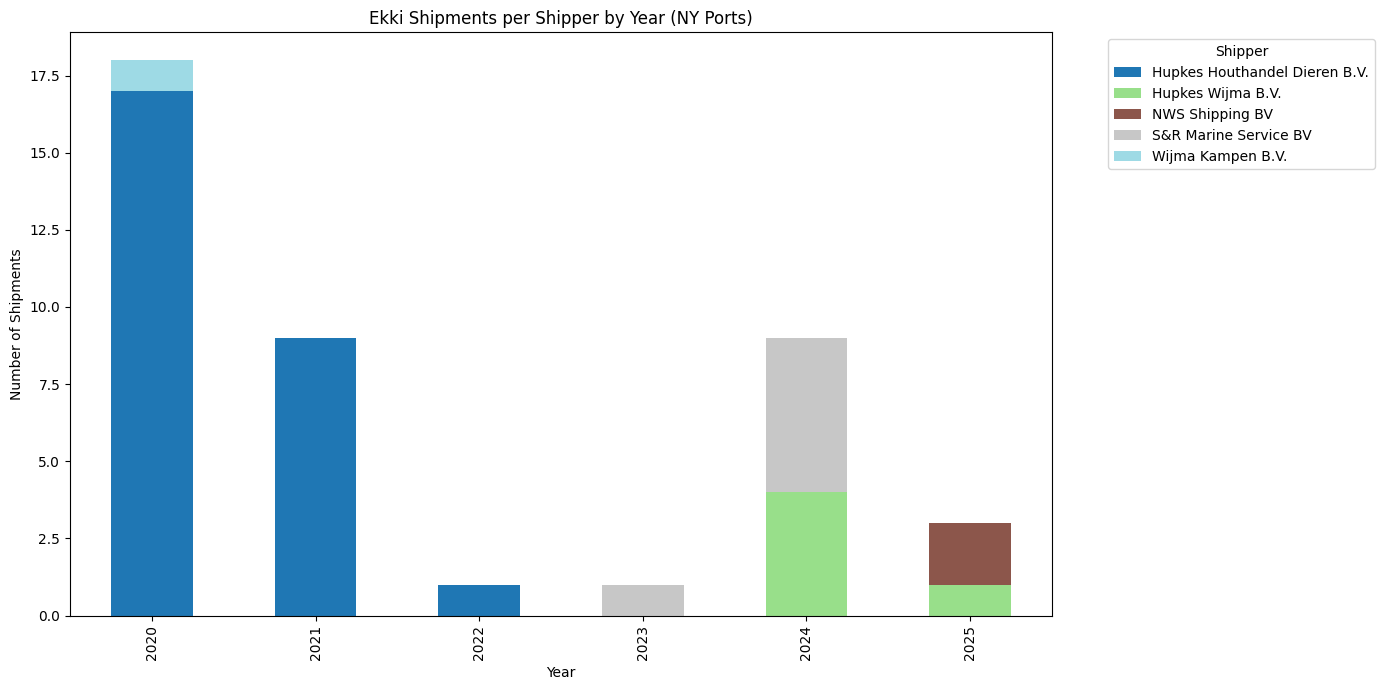

In [144]:
ekki_shipments_per_shipper_ny.plot(
    kind='bar',
    stacked=True,
    figsize=(14, 7),
    colormap='tab20'  # optional: use a diverse color palette
)

plt.title('Ekki Shipments per Shipper by Year (NY Ports)')
plt.xlabel('Year')
plt.ylabel('Number of Shipments')
plt.legend(title='Shipper', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [145]:
ekki_shipments_per_shipper_ny_weight = ny[ny['ekki']].pivot_table(
    index='YEAR',
    columns='SHIPPER_CLEANED',
    values='GROSS WEIGHT (KG)',  # any column name is fine for counting rows
    aggfunc='sum',
    fill_value=0
)

In [146]:
ekki_shipments_per_shipper_ny_weight

SHIPPER_CLEANED,Hupkes Houthandel Dieren B.V.,Hupkes Wijma B.V.,NWS Shipping BV,S&R Marine Service BV,Wijma Kampen B.V.
YEAR,,,,,
2020,469060,0,0,0,28431
2021,227005,0,0,0,0
2022,34600,0,0,0,0
2023,0,0,0,19711,0
2024,0,77850,0,117700,0
2025,0,39000,31036,0,0


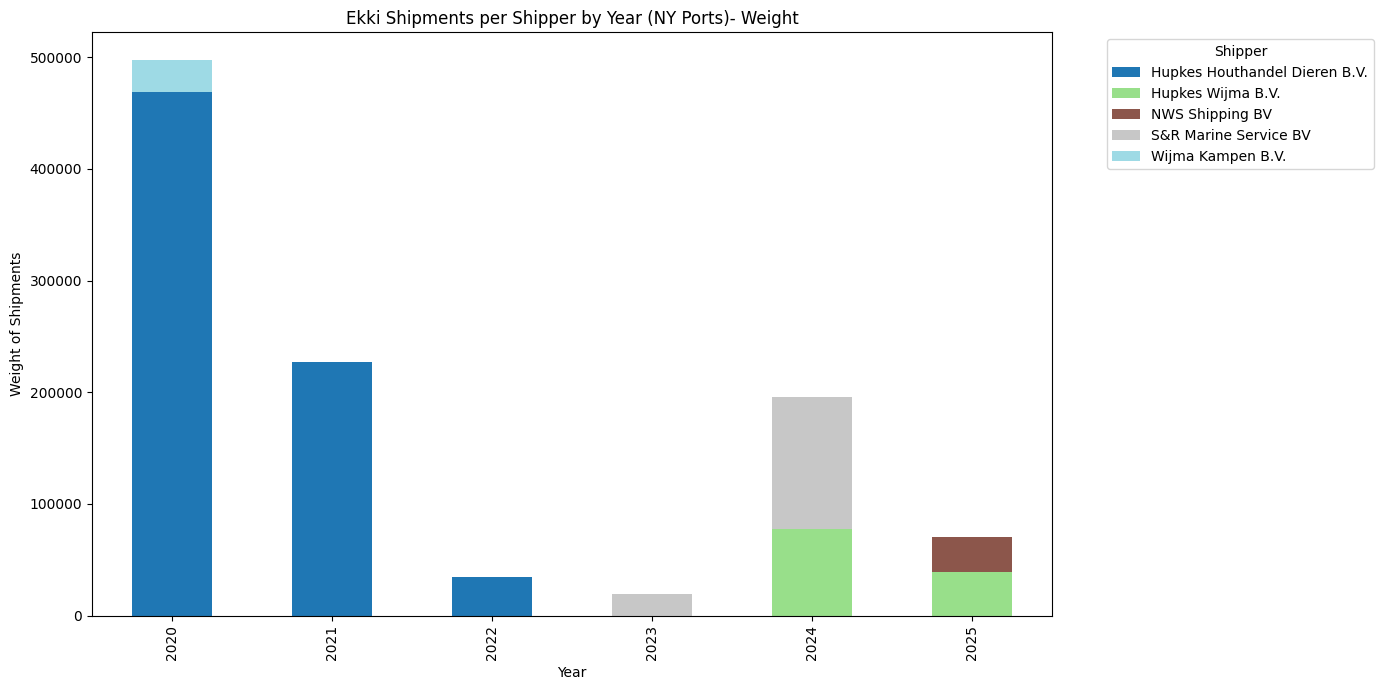

In [147]:
ekki_shipments_per_shipper_ny_weight.plot(
    kind='bar',
    stacked=True,
    figsize=(14, 7),
    colormap='tab20'  # optional: use a diverse color palette
)

plt.title('Ekki Shipments per Shipper by Year (NY Ports)- Weight')
plt.xlabel('Year')
plt.ylabel('Weight of Shipments')
plt.legend(title='Shipper', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### The total weight imported has declined over the years, but rose again slightly in 2024. Matches the overall trend in number of shipments, but the difference is a little starker here (meaning shipments were a little bigger in 2020).